# Assignment 1 PART A INFO 7374 Deep Learning and AI
## Building a Convolutional Neural Network for CIFAR-10 dataset and finding the best optimization technique
By Vignesh Murali NUID 001886775


In this report, we observe how  SGD and Adagrad Optimizers affect the performance of a Convolutional Neural Network.

We tweak learning rate for the models and we test Nesterov Momentum for SGD Optimizer.

Import modules and packages

In [1]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


Accuracy & Loss graph plots

In [0]:
import matplotlib.pyplot as plt
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
def plotAcc(history):  
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

Base model parameters

In [0]:

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

Split and preprocess image data

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 70s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Base Model

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [0]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [0]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
validation_split=0.0)

Using real-time data augmentation.


In [0]:

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [0]:

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,steps_per_epoch=len(x_train)/batch_size)


Epoch 1/100
1563/1562 [==============================] - 48s 31ms/step - loss: 1.8712 - acc: 0.3122 - val_loss: 1.5961 - val_acc: 0.4177
Epoch 2/100
1563/1562 [==============================] - 45s 29ms/step - loss: 1.5850 - acc: 0.4237 - val_loss: 1.4773 - val_acc: 0.4651
Epoch 3/100
1563/1562 [==============================] - 45s 29ms/step - loss: 1.4614 - acc: 0.4715 - val_loss: 1.3042 - val_acc: 0.5311
Epoch 4/100
1563/1562 [==============================] - 45s 29ms/step - loss: 1.3821 - acc: 0.5044 - val_loss: 1.2219 - val_acc: 0.5649
Epoch 5/100
1563/1562 [==============================] - 45s 29ms/step - loss: 1.3202 - acc: 0.5301 - val_loss: 1.3132 - val_acc: 0.5372
Epoch 6/100
1563/1562 [==============================] - 45s 29ms/step - loss: 1.2608 - acc: 0.5502 - val_loss: 1.1167 - val_acc: 0.6052
Epoch 7/100
1563/1562 [==============================] - 45s 29ms/step - loss: 1.2207 - acc: 0.5667 - val_loss: 1.0926 - val_acc: 0.6112
Epoch 8/100
1563/1562 [==================

In [0]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores1 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores1[0])
print('Test accuracy:', scores1[1])

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 1s 140us/step
Test loss: 0.686810600566864
Test accuracy: 0.7727


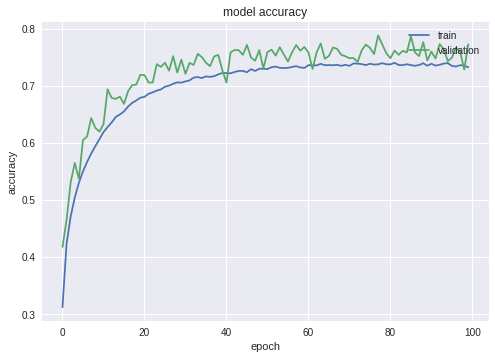

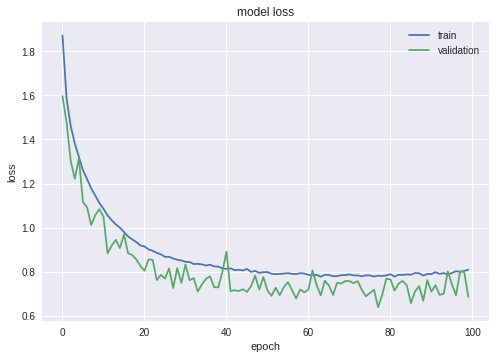

In [0]:
plotAcc(history)
plotLosses(history)

# 0.01 Learning Rate
## Using Adagrad Optimizer

In [0]:
adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=adagrad,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [41]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
validation_split=0.0)

Using real-time data augmentation.


In [0]:
datagen.fit(x_train)

In [43]:
history2 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,steps_per_epoch=len(x_train)/batch_size)

Epoch 1/100
1563/1562 [==============================] - 51s 33ms/step - loss: 1.6805 - acc: 0.3816 - val_loss: 1.3048 - val_acc: 0.5262
Epoch 2/100
1563/1562 [==============================] - 51s 32ms/step - loss: 1.3483 - acc: 0.5106 - val_loss: 1.1897 - val_acc: 0.5686
Epoch 3/100
1563/1562 [==============================] - 50s 32ms/step - loss: 1.2238 - acc: 0.5590 - val_loss: 1.0412 - val_acc: 0.6254
Epoch 4/100
1563/1562 [==============================] - 49s 31ms/step - loss: 1.1383 - acc: 0.5949 - val_loss: 0.9858 - val_acc: 0.6558
Epoch 5/100
1563/1562 [==============================] - 50s 32ms/step - loss: 1.0802 - acc: 0.6148 - val_loss: 0.9929 - val_acc: 0.6480
Epoch 6/100
1563/1562 [==============================] - 49s 32ms/step - loss: 1.0372 - acc: 0.6354 - val_loss: 0.9196 - val_acc: 0.6798
Epoch 7/100
1563/1562 [==============================] - 50s 32ms/step - loss: 0.9993 - acc: 0.6470 - val_loss: 0.8918 - val_acc: 0.6930
Epoch 8/100
1563/1562 [==================

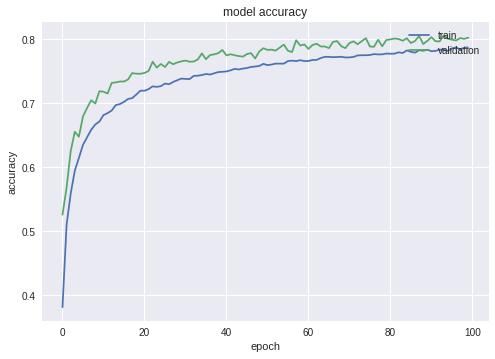

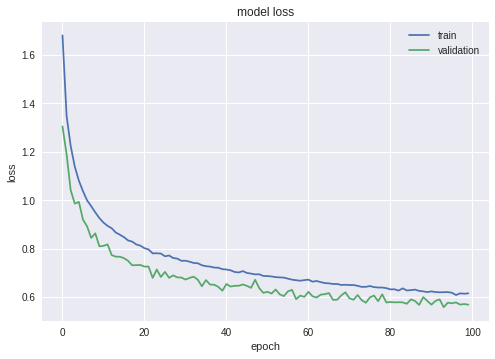

In [44]:
plotAcc(history2)
plotLosses(history2)

In [45]:
scores2 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores2[0])
print('Test accuracy:', scores2[1])

10000/10000 [==============================] - 2s 172us/step
Test loss: 0.5684759526729584
Test accuracy: 0.8027


## SGD Optimizer

In [0]:
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
validation_split=0.0)

Using real-time data augmentation.


In [0]:
datagen.fit(x_train)

In [9]:
history3 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,steps_per_epoch=len(x_train)/batch_size)

Epoch 1/100
1563/1562 [==============================] - 49s 32ms/step - loss: 2.0749 - acc: 0.2280 - val_loss: 1.8584 - val_acc: 0.3450
Epoch 2/100
1563/1562 [==============================] - 45s 29ms/step - loss: 1.8257 - acc: 0.3354 - val_loss: 1.6094 - val_acc: 0.4130
Epoch 3/100
1563/1562 [==============================] - 44s 28ms/step - loss: 1.6754 - acc: 0.3875 - val_loss: 1.5384 - val_acc: 0.4394
Epoch 4/100
1563/1562 [==============================] - 45s 29ms/step - loss: 1.5514 - acc: 0.4328 - val_loss: 1.5189 - val_acc: 0.4738
Epoch 5/100
1563/1562 [==============================] - 44s 28ms/step - loss: 1.4722 - acc: 0.4643 - val_loss: 1.3009 - val_acc: 0.5286
Epoch 6/100
1563/1562 [==============================] - 44s 28ms/step - loss: 1.4146 - acc: 0.4884 - val_loss: 1.2782 - val_acc: 0.5335
Epoch 7/100
1563/1562 [==============================] - 45s 29ms/step - loss: 1.3651 - acc: 0.5074 - val_loss: 1.2618 - val_acc: 0.5419
Epoch 8/100
1563/1562 [==================

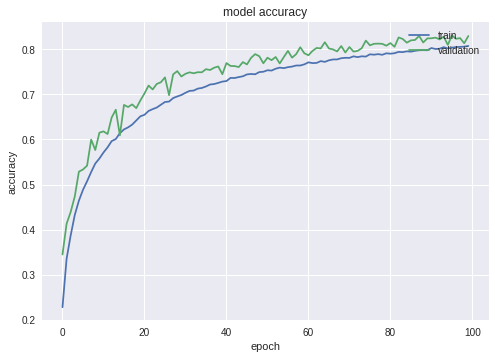

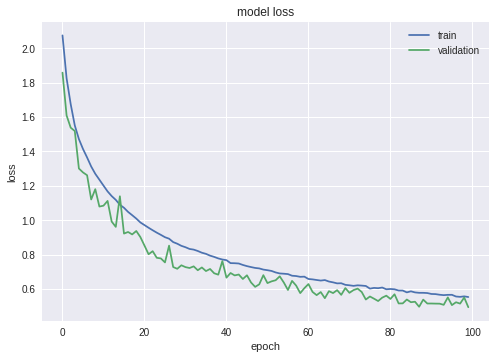

In [10]:
plotAcc(history3)
plotLosses(history3)

In [12]:
scores4 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores4[0])
print('Test accuracy:', scores4[1])

10000/10000 [==============================] - 1s 144us/step
Test loss: 0.4942884718894959
Test accuracy: 0.8294


# 0.001 Learning Rate
## AdaGrad optimizer

In [0]:
adagrad = keras.optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=adagrad,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [14]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
validation_split=0.0)

Using real-time data augmentation.


In [0]:
datagen.fit(x_train)

In [16]:
history4 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,steps_per_epoch=len(x_train)/batch_size)

Epoch 1/100
1563/1562 [==============================] - 50s 32ms/step - loss: 2.3134 - acc: 0.1044 - val_loss: 2.3078 - val_acc: 0.1000
Epoch 2/100
1563/1562 [==============================] - 50s 32ms/step - loss: 2.2987 - acc: 0.1121 - val_loss: 2.3055 - val_acc: 0.1000
Epoch 3/100
1563/1562 [==============================] - 50s 32ms/step - loss: 2.2675 - acc: 0.1340 - val_loss: 2.2474 - val_acc: 0.1208
Epoch 4/100
1563/1562 [==============================] - 50s 32ms/step - loss: 2.1986 - acc: 0.1635 - val_loss: 2.2918 - val_acc: 0.1475
Epoch 5/100
1563/1562 [==============================] - 49s 32ms/step - loss: 2.1399 - acc: 0.1889 - val_loss: 2.0966 - val_acc: 0.1900
Epoch 6/100
1563/1562 [==============================] - 50s 32ms/step - loss: 2.1058 - acc: 0.2031 - val_loss: 2.0796 - val_acc: 0.1923
Epoch 7/100
1563/1562 [==============================] - 50s 32ms/step - loss: 2.0776 - acc: 0.2153 - val_loss: 2.0722 - val_acc: 0.2092
Epoch 8/100
1563/1562 [==================

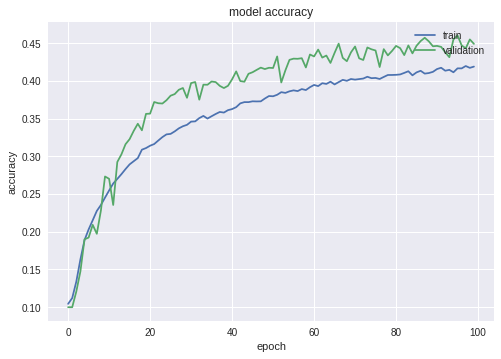

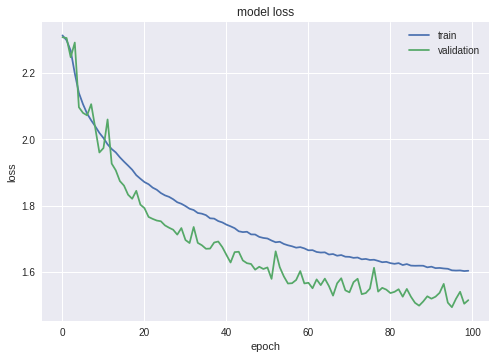

In [19]:
plotAcc(history4)
plotLosses(history4)

In [20]:
scores5 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores5[0])
print('Test accuracy:', scores5[1])

10000/10000 [==============================] - 2s 151us/step
Test loss: 1.5146695198059081
Test accuracy: 0.4491


## SGD Optimizer

In [0]:
sgd = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [19]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
validation_split=0.0)

Using real-time data augmentation.


In [0]:
datagen.fit(x_train)

In [21]:
history7 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,steps_per_epoch=len(x_train)/batch_size)

Epoch 1/100
1563/1562 [==============================] - 45s 29ms/step - loss: 2.3024 - acc: 0.1087 - val_loss: 2.2945 - val_acc: 0.1217
Epoch 2/100
1563/1562 [==============================] - 44s 28ms/step - loss: 2.2852 - acc: 0.1272 - val_loss: 2.2648 - val_acc: 0.1627
Epoch 3/100
1563/1562 [==============================] - 44s 28ms/step - loss: 2.2242 - acc: 0.1661 - val_loss: 2.1380 - val_acc: 0.2507
Epoch 4/100
1563/1562 [==============================] - 44s 28ms/step - loss: 2.1023 - acc: 0.2124 - val_loss: 2.0142 - val_acc: 0.2711
Epoch 5/100
1563/1562 [==============================] - 44s 28ms/step - loss: 2.0473 - acc: 0.2397 - val_loss: 1.9791 - val_acc: 0.2856
Epoch 6/100
1563/1562 [==============================] - 44s 28ms/step - loss: 2.0148 - acc: 0.2526 - val_loss: 1.9403 - val_acc: 0.2982
Epoch 7/100
1563/1562 [==============================] - 44s 28ms/step - loss: 1.9770 - acc: 0.2710 - val_loss: 1.8948 - val_acc: 0.3272
Epoch 8/100
1563/1562 [==================

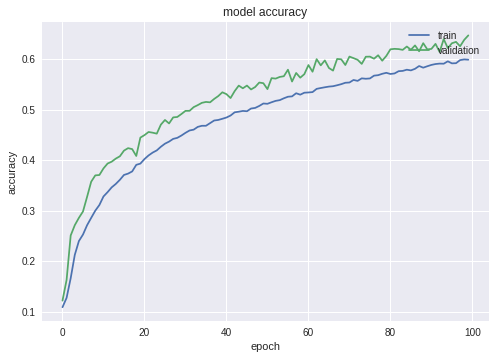

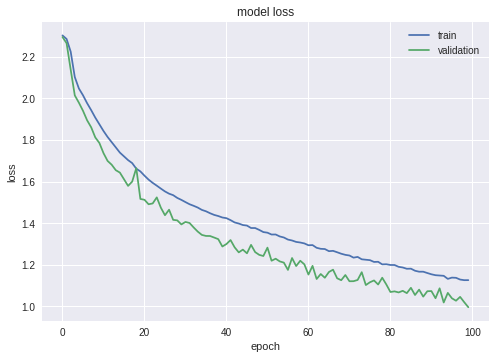

In [22]:
plotAcc(history7)
plotLosses(history7)

In [23]:
scores7 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores7[0])
print('Test accuracy:', scores7[1])

10000/10000 [==============================] - 1s 134us/step
Test loss: 0.9965577210426331
Test accuracy: 0.6468


# 0.0001 Learning Rate

## SGD Optimizer

In [0]:
sgd = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [52]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
validation_split=0.0)

Using real-time data augmentation.


In [0]:
datagen.fit(x_train)

In [54]:
history4 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,steps_per_epoch=len(x_train)/batch_size)

Epoch 1/100
1563/1562 [==============================] - 50s 32ms/step - loss: 2.3207 - acc: 0.1030 - val_loss: 2.2993 - val_acc: 0.1103
Epoch 2/100
1563/1562 [==============================] - 49s 31ms/step - loss: 2.3072 - acc: 0.1059 - val_loss: 2.2973 - val_acc: 0.1228
Epoch 3/100
1563/1562 [==============================] - 49s 31ms/step - loss: 2.3031 - acc: 0.1095 - val_loss: 2.2961 - val_acc: 0.1227
Epoch 4/100
1563/1562 [==============================] - 49s 31ms/step - loss: 2.3006 - acc: 0.1110 - val_loss: 2.2948 - val_acc: 0.1214
Epoch 5/100
1563/1562 [==============================] - 49s 31ms/step - loss: 2.2996 - acc: 0.1124 - val_loss: 2.2936 - val_acc: 0.1182
Epoch 6/100
1563/1562 [==============================] - 49s 31ms/step - loss: 2.2978 - acc: 0.1141 - val_loss: 2.2921 - val_acc: 0.1185
Epoch 7/100
1563/1562 [==============================] - 50s 32ms/step - loss: 2.2955 - acc: 0.1178 - val_loss: 2.2905 - val_acc: 0.1207
Epoch 8/100
1563/1562 [==================

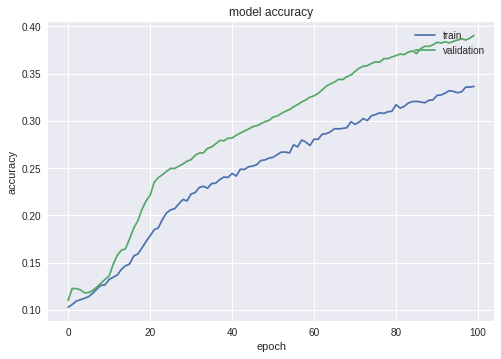

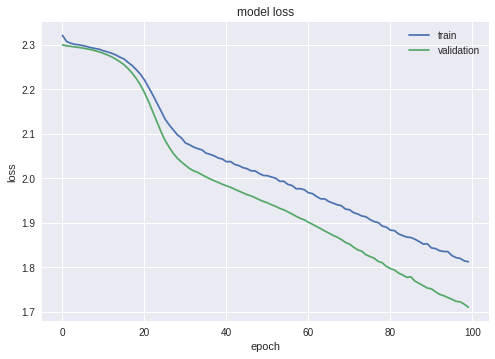

In [55]:
plotAcc(history4)
plotLosses(history4)

In [56]:
scores5 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores5[0])
print('Test accuracy:', scores5[1])

10000/10000 [==============================] - 2s 158us/step
Test loss: 1.7100832984924317
Test accuracy: 0.3903


## AdaGrad Optimizer

In [0]:
adagrad = keras.optimizers.Adagrad(lr=0.0001, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=adagrad,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
validation_split=0.0)

Using real-time data augmentation.


In [0]:
datagen.fit(x_train)

In [9]:
history5 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,steps_per_epoch=len(x_train)/batch_size)

Epoch 1/100
1563/1562 [==============================] - 49s 32ms/step - loss: 2.2854 - acc: 0.1299 - val_loss: 2.2619 - val_acc: 0.1496
Epoch 2/100
1563/1562 [==============================] - 45s 29ms/step - loss: 2.2282 - acc: 0.1690 - val_loss: 2.1820 - val_acc: 0.2398
Epoch 3/100
1563/1562 [==============================] - 45s 29ms/step - loss: 2.1465 - acc: 0.2004 - val_loss: 2.0896 - val_acc: 0.2546
Epoch 4/100
1563/1562 [==============================] - 45s 29ms/step - loss: 2.0894 - acc: 0.2199 - val_loss: 2.0457 - val_acc: 0.2639
Epoch 5/100
1563/1562 [==============================] - 45s 29ms/step - loss: 2.0642 - acc: 0.2265 - val_loss: 2.0250 - val_acc: 0.2737
Epoch 6/100
1563/1562 [==============================] - 45s 29ms/step - loss: 2.0481 - acc: 0.2384 - val_loss: 2.0105 - val_acc: 0.2790
Epoch 7/100
1563/1562 [==============================] - 45s 29ms/step - loss: 2.0384 - acc: 0.2417 - val_loss: 2.0004 - val_acc: 0.2842
Epoch 8/100
1563/1562 [==================

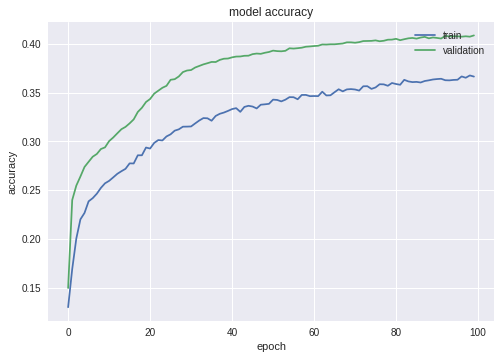

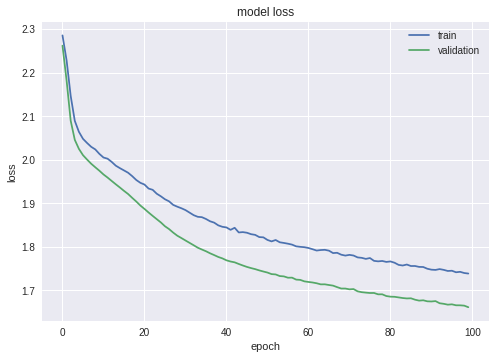

In [10]:
plotAcc(history5)
plotLosses(history5)

In [12]:
scores6 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores6[0])
print('Test accuracy:', scores6[1])

10000/10000 [==============================] - 1s 140us/step
Test loss: 1.6615187692642213
Test accuracy: 0.4086


The best model has found to be SGD with 0.01 Learning Rate

We observe that performance decreases with decrease in learning rate in both SGD and AdaGrad.

## SGD with Nesterov Momentum

In [0]:
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
validation_split=0.0)

Using real-time data augmentation.


In [0]:
datagen.fit(x_train)

In [9]:
history10 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,steps_per_epoch=len(x_train)/batch_size)

Epoch 1/100
1563/1562 [==============================] - 48s 31ms/step - loss: 2.1112 - acc: 0.2146 - val_loss: 1.9187 - val_acc: 0.3278
Epoch 2/100
1563/1562 [==============================] - 44s 28ms/step - loss: 1.8649 - acc: 0.3235 - val_loss: 1.6612 - val_acc: 0.4096
Epoch 3/100
1563/1562 [==============================] - 44s 28ms/step - loss: 1.7095 - acc: 0.3761 - val_loss: 1.5254 - val_acc: 0.4490
Epoch 4/100
1563/1562 [==============================] - 44s 28ms/step - loss: 1.6023 - acc: 0.4141 - val_loss: 1.4281 - val_acc: 0.4824
Epoch 5/100
1563/1562 [==============================] - 44s 28ms/step - loss: 1.5151 - acc: 0.4478 - val_loss: 1.3840 - val_acc: 0.4964
Epoch 6/100
1563/1562 [==============================] - 44s 28ms/step - loss: 1.4509 - acc: 0.4729 - val_loss: 1.2644 - val_acc: 0.5495
Epoch 7/100
1563/1562 [==============================] - 44s 28ms/step - loss: 1.3969 - acc: 0.4942 - val_loss: 1.2598 - val_acc: 0.5409
Epoch 8/100
1563/1562 [==================

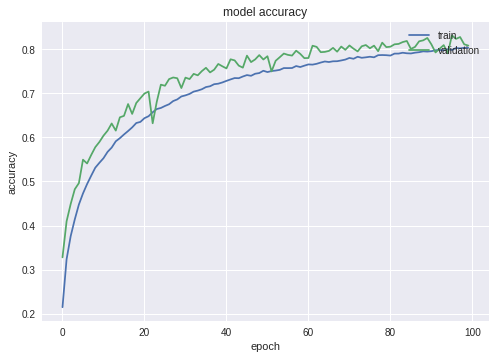

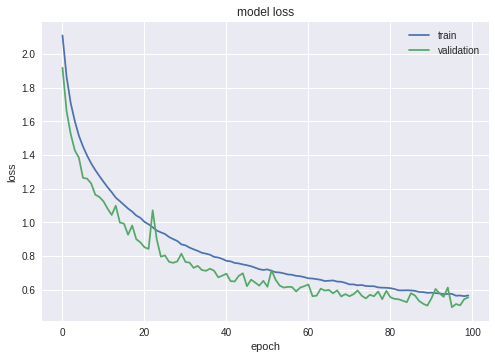

In [10]:
plotAcc(history10)
plotLosses(history10)

In [11]:
scores10 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores10[0])
print('Test accuracy:', scores10[1])

10000/10000 [==============================] - 1s 143us/step
Test loss: 0.5539608464241028
Test accuracy: 0.8085
